In [29]:
# 필요한 library 들을 import
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
%matplotlib inline
import seaborn as sns
import pandas as pd
import scipy as sp

In [2]:
# 데이터 로드 및 확인
filename = ("부천시_최종.csv")
names = ['PK', 'BLOCK_ID','SPEC', 'WICHOC','DAEJANG','DAEJANGNAME', 'ADDR', 'NEWADDR', 
         'BUBCODE',' DAGI', 'BUN', 'GI', 'WEPIL', 'NEWBUBCODE',
         'GUNMUN','GUNPE','YUNMUN','YONGYUN','YONG','GUJO','GUJONAME','GITAGUHO',
         'MAINYONGCODE','MAINYONGNAME','GITAYONG','ROOFCODE','ROOFNAME','GITAROOF',
         'SAEDAE','HEIGHT','LEVEL_U','LEVEL_D','ELEVATOR','EMERGEN_ELE','BUSOC',
         'BUSOCMUN','ALLYUN','INGIGE','INGIGEMUN','OUTGIGE','OUTGIGEMUN','INJAJU','INJAJUMUN'
         ,'OUTJAJU','OUTJAJUMUN','AGE_DATE','AGING','TOGIMUN','YONGDO','CHECK']
'''1	일반상업지역
2	일반상업지역자연녹지지역
3	일반상업지역제3종일반주거지역
4	자연녹지지역제2종일반주거지역
5	제1종일반주거지역
6	제2종일반주거지역
7	제2종일반주거지역제3종일반주거지역
8	제2종일반주거지역준공업지역
9	제3종일반주거지역
10	제3종일반주거지역준주거지역
11  준주거지역'''
dataset = pd.read_csv(filename,encoding='euc_kr',names=names,skiprows=1)
dataset=dataset[dataset['TOGIMUN']<10000]#토지면적이 10000이하만 가져간다
dataset=dataset[dataset['SAEDAE']!=0]
dataset.loc[dataset.YONGDO=='일반상업지역',['YONGDO']]=1
dataset.loc[dataset.YONGDO=='일반상업지역자연녹지지역',['YONGDO']]=2
dataset.loc[dataset.YONGDO=='일반상업지역제3종일반주거지역',['YONGDO']]=3
dataset.loc[dataset.YONGDO=='자연녹지지역제2종일반주거지역',['YONGDO']]=4
dataset.loc[dataset.YONGDO=='제1종일반주거지역',['YONGDO']]=5
dataset.loc[dataset.YONGDO=='제2종일반주거지역',['YONGDO']]=6
dataset.loc[dataset.YONGDO=='제2종일반주거지역제3종일반주거지역',['YONGDO']]=7
dataset.loc[dataset.YONGDO=='제2종일반주거지역준공업지역',['YONGDO']]=8
dataset.loc[dataset.YONGDO=='제3종일반주거지역',['YONGDO']]=9
dataset.loc[dataset.YONGDO=='제3종일반주거지역준주거지역',['YONGDO']]=10
dataset.loc[dataset.YONGDO=='준주거지역',['YONGDO']]=11
#states.loc[states.density > 100, ['density']] = 10
dataset['YONGJUC']=dataset['YONGYUN']*100/dataset['TOGIMUN']#용적률구하기
dataset['DAGIRATIO']=(dataset['TOGIMUN']/dataset['SAEDAE'])/3.306 #대지지분율 구하기 13평보다 커야 효과가 좋음
print(dataset.head)

<bound method NDFrame.head of              PK  BLOCK_ID  SPEC WICHOC  DAEJANG DAEJANGNAME  \
0        225396      58.0   1.0      N        2          집합   
1        225382      58.0   1.0      N        2          집합   
2        225383      58.0   1.0      N        2          집합   
3        225384      58.0   1.0      N        2          집합   
4        225395      58.0   1.0      N        2          집합   
5     100260971      58.0   1.0      Y        2          집합   
6        225380      58.0   1.0      N        2          집합   
7        225379      58.0   1.0      N        2          집합   
8        225257      58.0   1.0      N        2          집합   
9        225381      58.0   1.0      N        2          집합   
10    100201476      58.0   1.0    NaN        2          집합   
11    100247385      58.0   1.0      N        2          집합   
12       225397      58.0   1.0      N        2          집합   
13       225393      58.0   1.0      N        2          집합   
14       225394      58.0

In [3]:
# 데이터 기초 통계량 확인
pd.set_option('precision', 2)
dataset.describe()

,PK,BLOCK_ID,SPEC,DAEJANG,BUBCODE,DAGI,BUN,GI,WEPIL,NEWBUBCODE,...,INJAJUMUN,OUTJAJU,OUTJAJUMUN,AGE_DATE,AGING,TOGIMUN,YONGDO,CHECK,YONGJUC,DAGIRATIO
count,2.38e+03,2336.00,2353.00,2379.00,2379.00,2.38e+03,2379.00,2379.00,2379.0,2378.00,...,2379.00,2379.00,2379.00,2.38e+03,2379.00,2379.00,2379.00,2379.00,2379.00,2379.00
mean,5.90e+06,1808.40,1.01,2.00,11629.89,5.46e-03,302.35,12.20,0.1,11627.19,...,10.15,0.87,9.59,1.99e+07,0.82,894.73,6.01,0.02,107.15,32.23
std,2.32e+07,997.49,0.07,0.02,648.59,7.37e-02,174.58,14.75,0.4,650.29,...,59.69,3.29,35.41,7.79e+04,0.38,1590.04,0.76,0.13,404.68,102.02
min,3.28e+03,58.00,1.00,1.00,10100.00,0.00e+00,2.00,0.00,0.0,10101.00,...,0.00,0.00,0.00,1.98e+07,0.00,28.00,1.00,0.00,0.00,0.17
25%,1.65e+05,1028.00,1.00,2.00,11300.00,0.00e+00,141.00,3.00,0.0,11301.00,...,0.00,0.00,0.00,1.99e+07,1.00,207.62,6.00,0.00,71.68,9.67
50%,2.22e+05,2019.50,1.00,2.00,12000.00,0.00e+00,309.00,8.00,0.0,12001.00,...,0.00,0.00,0.00,1.99e+07,1.00,246.30,6.00,0.00,75.87,11.15
75%,2.25e+05,2658.00,1.00,2.00,12100.00,0.00e+00,398.00,17.00,0.0,12101.00,...,0.00,0.00,0.00,1.99e+07,1.00,522.35,6.00,0.00,111.41,15.72
max,1.00e+08,3410.00,2.00,2.00,12400.00,1.00e+00,850.00,147.00,5.0,12406.00,...,1129.69,64.00,587.00,2.02e+07,1.00,9878.66,11.00,1.00,12283.93,2020.70


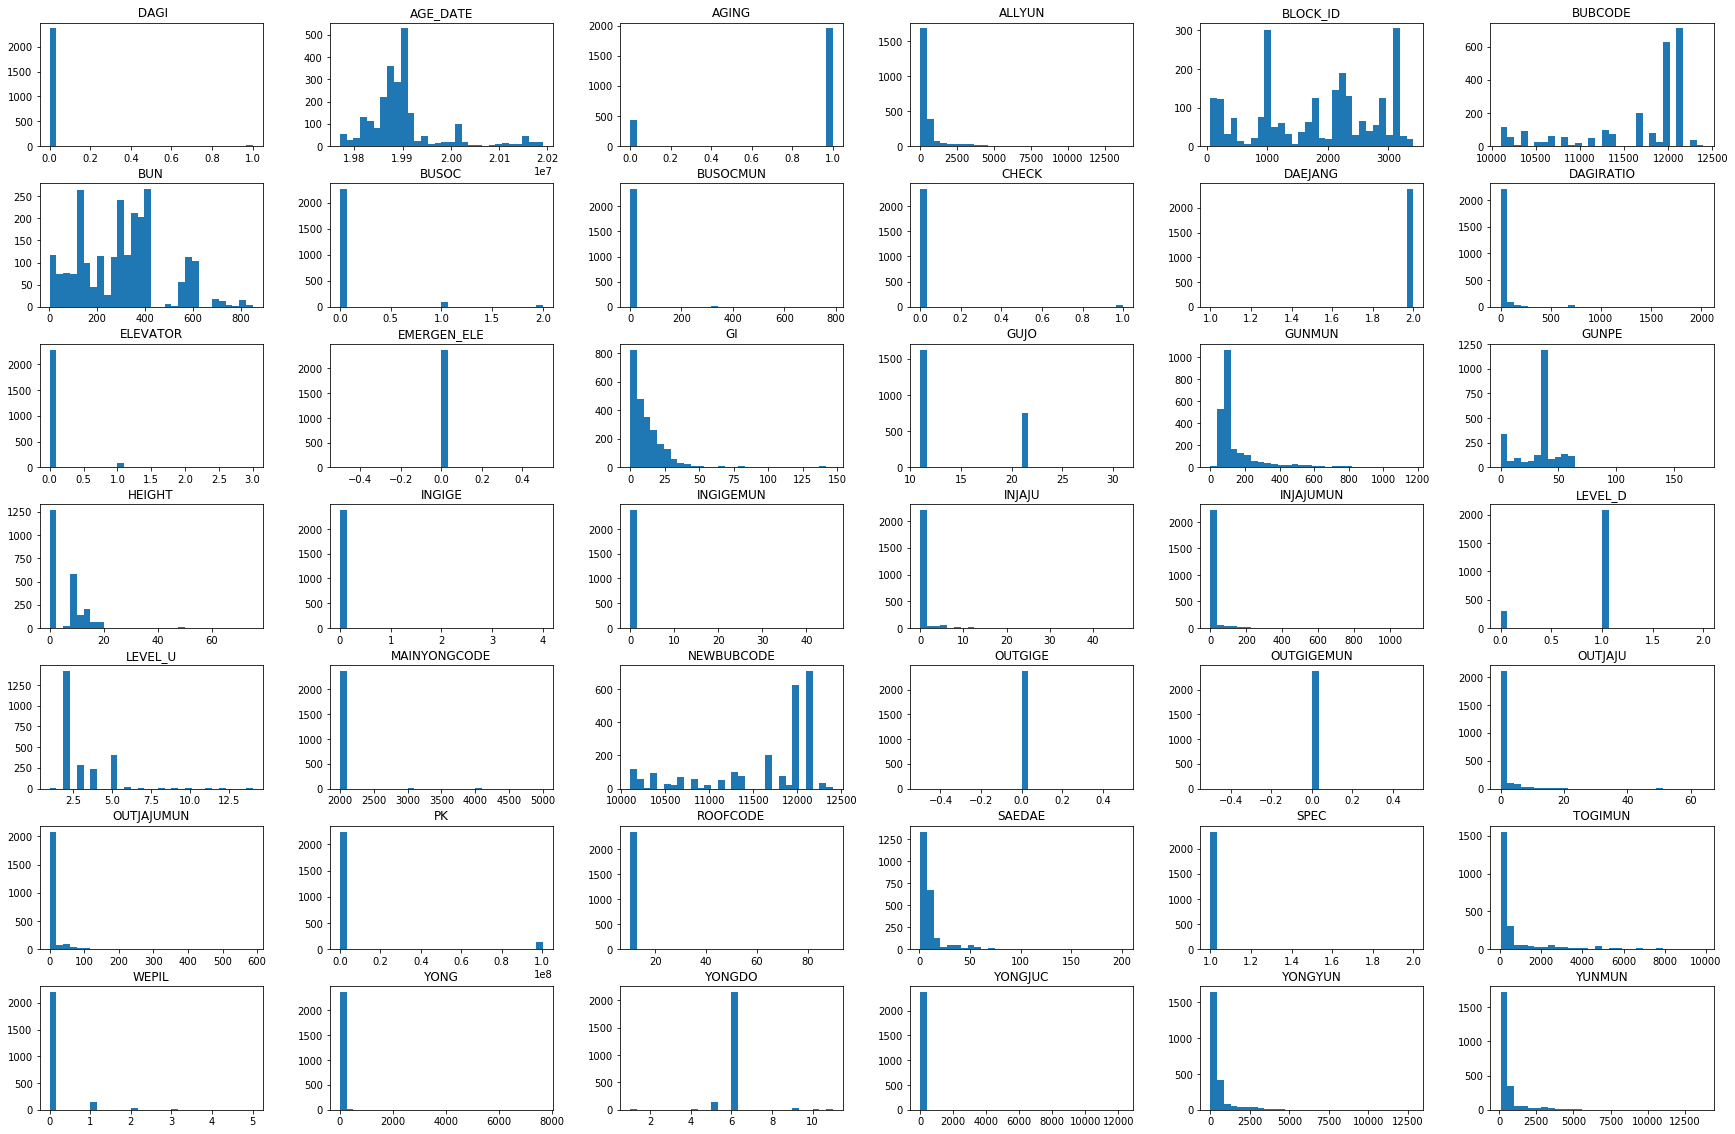

In [4]:
# 각 변수들의 분포 확인
dataset.hist(bins=30,figsize=(30,20), grid=False);

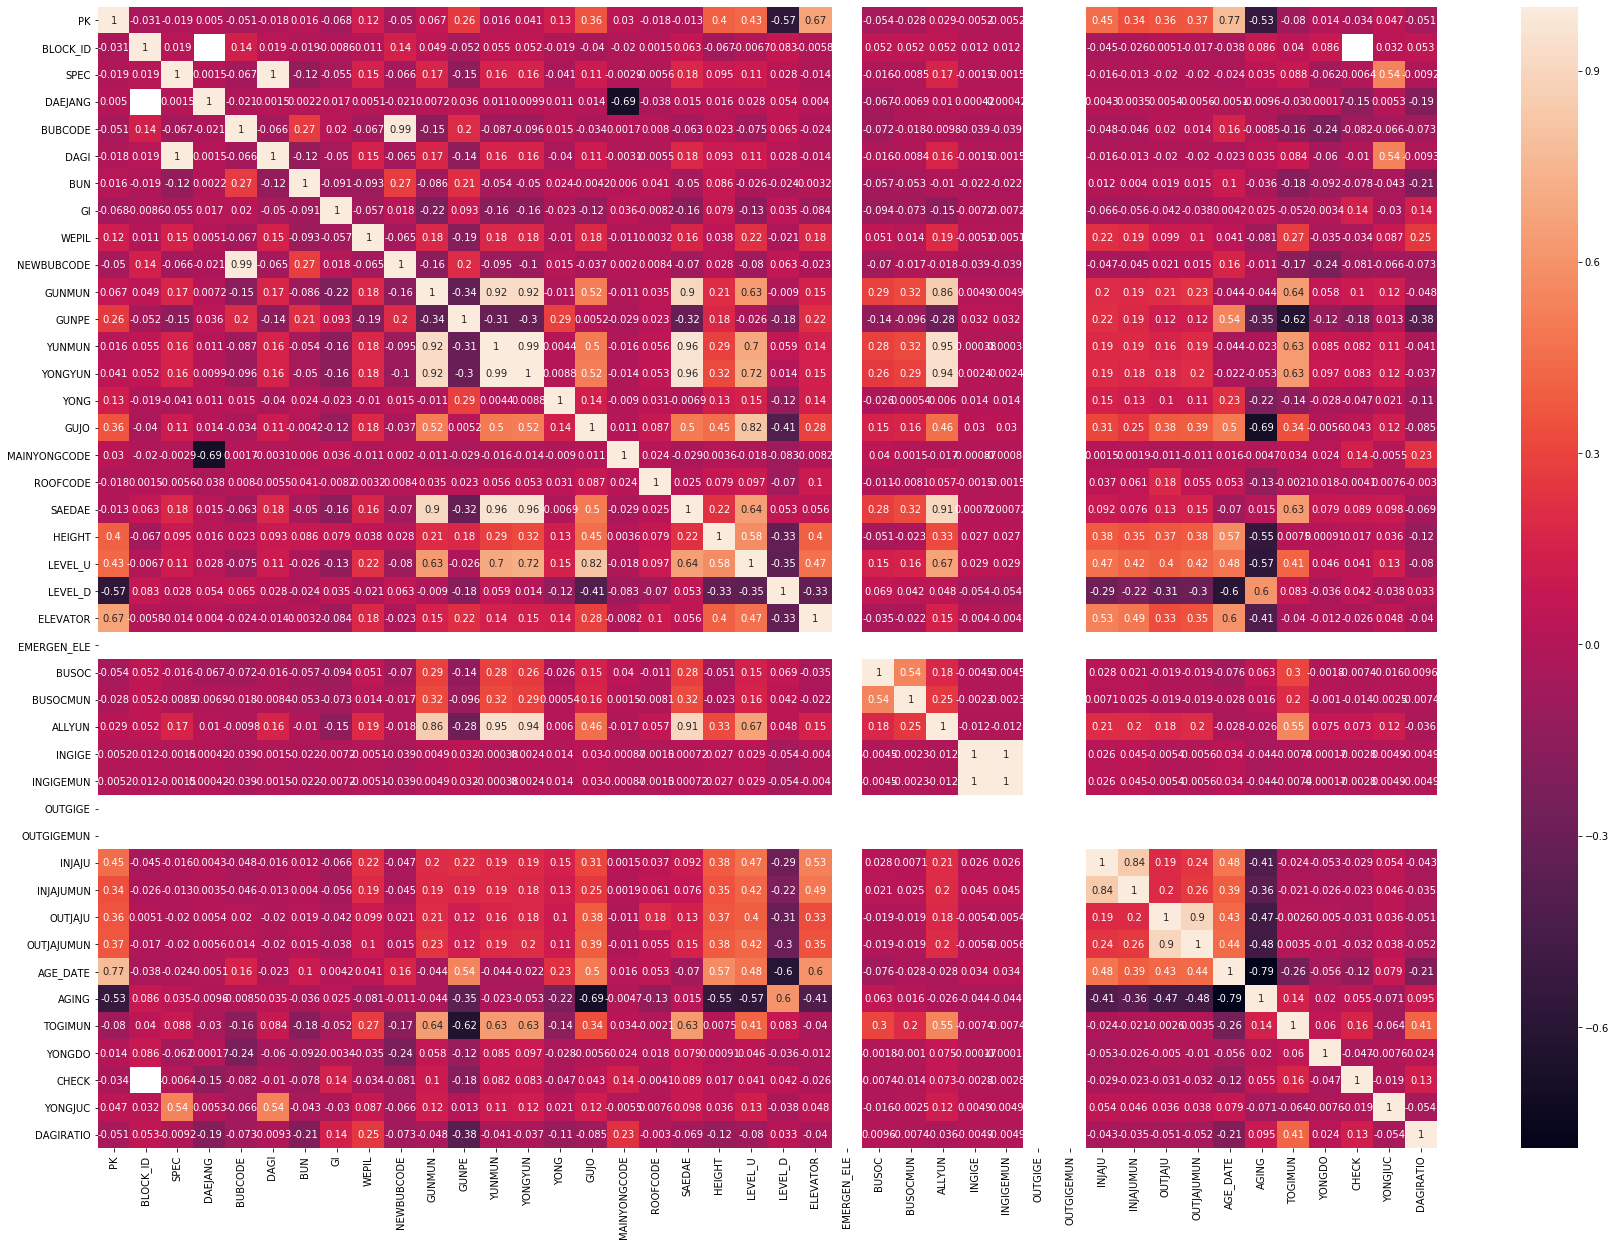

In [5]:
# 데이터 변수 간의 상관관계 확인
ax, fig = plt.subplots(figsize=(30,21))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

(array([2.208e+03, 8.600e+01, 3.400e+01, 1.500e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.300e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.69388990e-01, 6.75203670e+01, 1.34871345e+02, 2.02222323e+02,
        2.69573301e+02, 3.36924279e+02, 4.04275257e+02, 4.71626235e+02,
        5.38977213e+02, 6.06328191e+02, 6.73679169e+02, 7.41030147e+02,
        8.08381125e+02, 8.75732103e+02, 9.43083081e+02, 1.01043406e+03,
        1.07778504e+03, 1.14513602e+03, 1.21248699e+03, 1.27983797e+03,
        1.34718895e+03, 1.41453993e+03, 1.48189091e+03, 1.54924188e+03,
        1.61659286e+03, 1.68394384e+03, 1.75129482e+03, 1.81864580e+03,
        1.88599677e+03, 1.95334775e+03, 2.02069873e+03]),
 <a list of 30 Patch objects>)

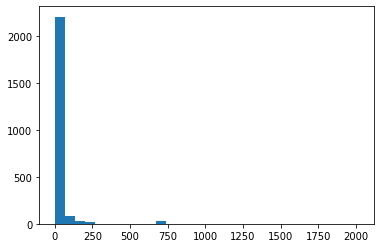

In [6]:
# 가치있다고 판단한 feature 히트맵 절대치 0.6기준
#도메인 익스퍼트가 가치있다고 한 부분 - 대지지분율 토지면적 연면적 노후도 용도 용적률
#PK SPEC DAEJANG GUNMUN GUNPE YUNMUN YONGYUN GUJO MAINYONGCODE SAEDAE LEVEL_U LEVEL_D ELEVATOR ALLYUN AGE_DATE AGING TOGIMUN CHECK YONGJUC DAGIRATIO
#CHECK 관계와 살펴보기
#대지지분율이 관계가 낮길래 분석해봄 0주변에 몰려있음
plt.hist(dataset['DAGIRATIO'],bins=30)

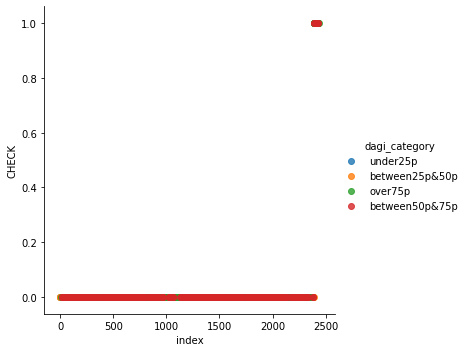

In [30]:
# 대지지분율 변수를 각 percentile로 categorize 하여 CHECK와의 관계를 살펴본다
dataset['index'] = dataset.index
dataset['dagi_category'] = np.where(dataset['DAGIRATIO'] < np.percentile(dataset['DAGIRATIO'],25), 'under25p', 
                                 np.where(dataset['DAGIRATIO'] < np.percentile(dataset['DAGIRATIO'],50), 'between25p&50p', 
                                         np.where(dataset['DAGIRATIO'] < np.percentile(dataset['DAGIRATIO'],75), 'between50p&75p', 'over75p')))
sns.lmplot('index','CHECK',data=dataset, hue='dagi_category', fit_reg=False)
dataset = dataset.drop(['dagi_category'], axis=1)

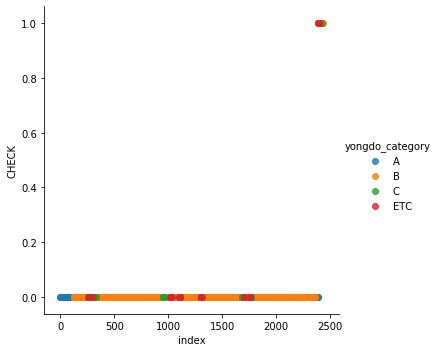

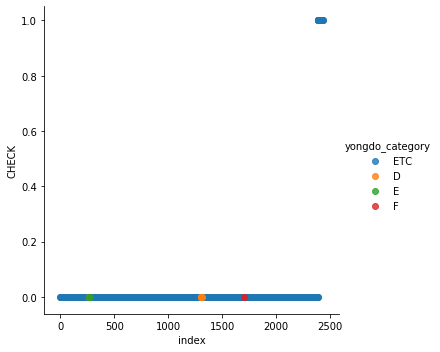

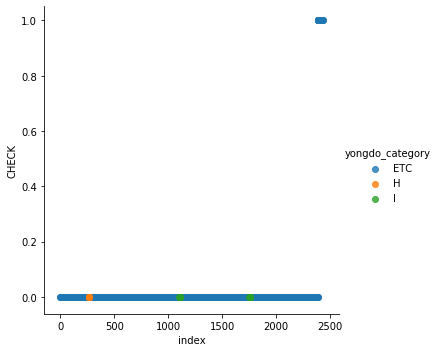

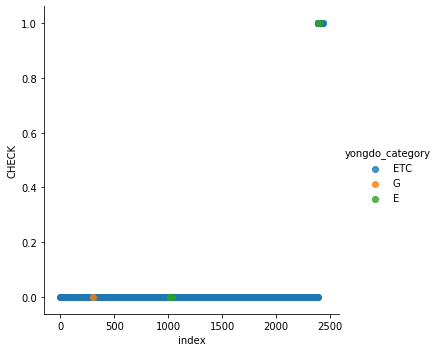

In [31]:
# CRIM 변수를 각 percentile로 categorize 하여 MEDV와의 관계를 살펴본다
'''1	일반상업지역
2	일반상업지역자연녹지지역
3	일반상업지역제3종일반주거지역
4	자연녹지지역제2종일반주거지역
5	제1종일반주거지역
6	제2종일반주거지역
7	제2종일반주거지역제3종일반주거지역
8	제2종일반주거지역준공업지역
9	제3종일반주거지역
10	제3종일반주거지역준주거지역'''
#1~3일반주거지역
dataset['index'] = dataset.index
dataset['yongdo_category'] = np.where(dataset['YONGDO'] == 5, 'A',
                                 np.where(dataset['YONGDO'] == 6, 'B',
                                 np.where(dataset['YONGDO'] == 9, 'C','ETC')))
sns.lmplot('index','CHECK',data=dataset, hue='yongdo_category', fit_reg=False)
dataset = dataset.drop(['yongdo_category'], axis=1)
#상업
dataset['yongdo_category'] = np.where(dataset['YONGDO'] == 1, 'D',
                                 np.where(dataset['YONGDO'] == 2, 'E',
                                 np.where(dataset['YONGDO'] == 3, 'F','ETC')))
sns.lmplot('index','CHECK',data=dataset, hue='yongdo_category', fit_reg=False)
dataset = dataset.drop(['yongdo_category'], axis=1)
#준공업,준주거
dataset['yongdo_category'] = np.where(dataset['YONGDO'] == 8, 'G',
                                 np.where(dataset['YONGDO'] == 10, 'H',
                                 np.where(dataset['YONGDO'] == 11, 'I','ETC')))
sns.lmplot('index','CHECK',data=dataset, hue='yongdo_category', fit_reg=False)
dataset = dataset.drop(['yongdo_category'], axis=1)
#기타
dataset['yongdo_category'] = np.where(dataset['YONGDO'] == 4, 'E',
                                 np.where(dataset['YONGDO'] == 7, 'G','ETC'))
sns.lmplot('index','CHECK',data=dataset, hue='yongdo_category', fit_reg=False)
dataset = dataset.drop(['yongdo_category'], axis=1)

dataset = dataset.drop(['index'], axis=1)

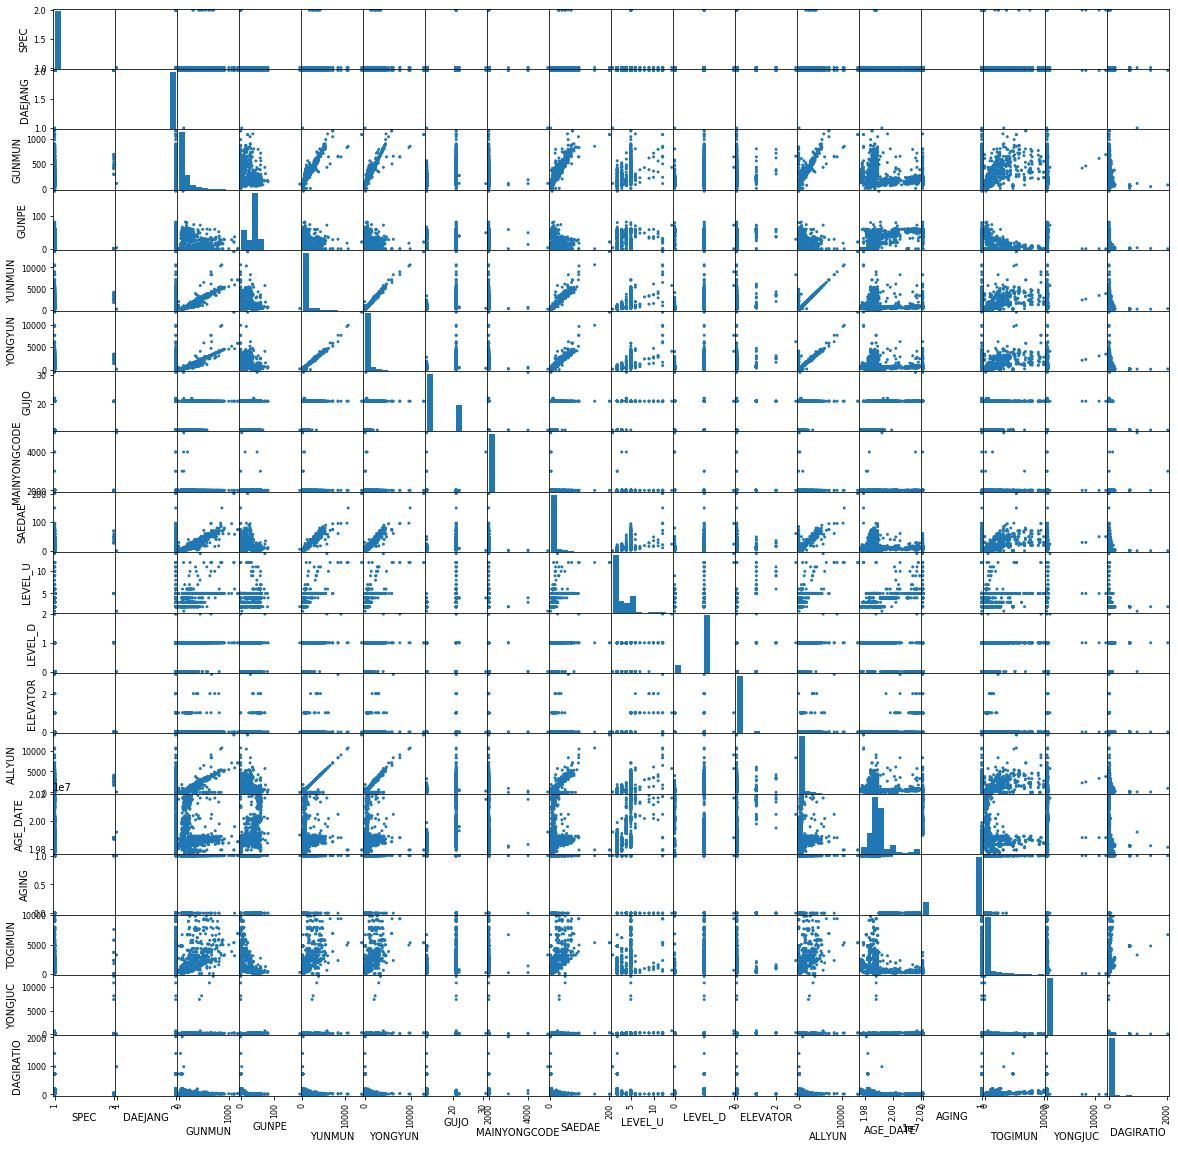

In [9]:
# 특정 변수들로 scatter matrix 생성
pd.plotting.scatter_matrix(dataset.loc[:,['SPEC', 'DAEJANG', 'GUNMUN', 'GUNPE', 'YUNMUN', 'YONGYUN', 'GUJO', 'MAINYONGCODE',
                            'SAEDAE', 'LEVEL_U', 'LEVEL_D', 'ELEVATOR', 'ALLYUN', 'AGE_DATE', 'AGING', 'TOGIMUN', 
                            'YONGJUC' ,'DAGIRATIO']], alpha=1.0, figsize=(20, 20))
plt.show()

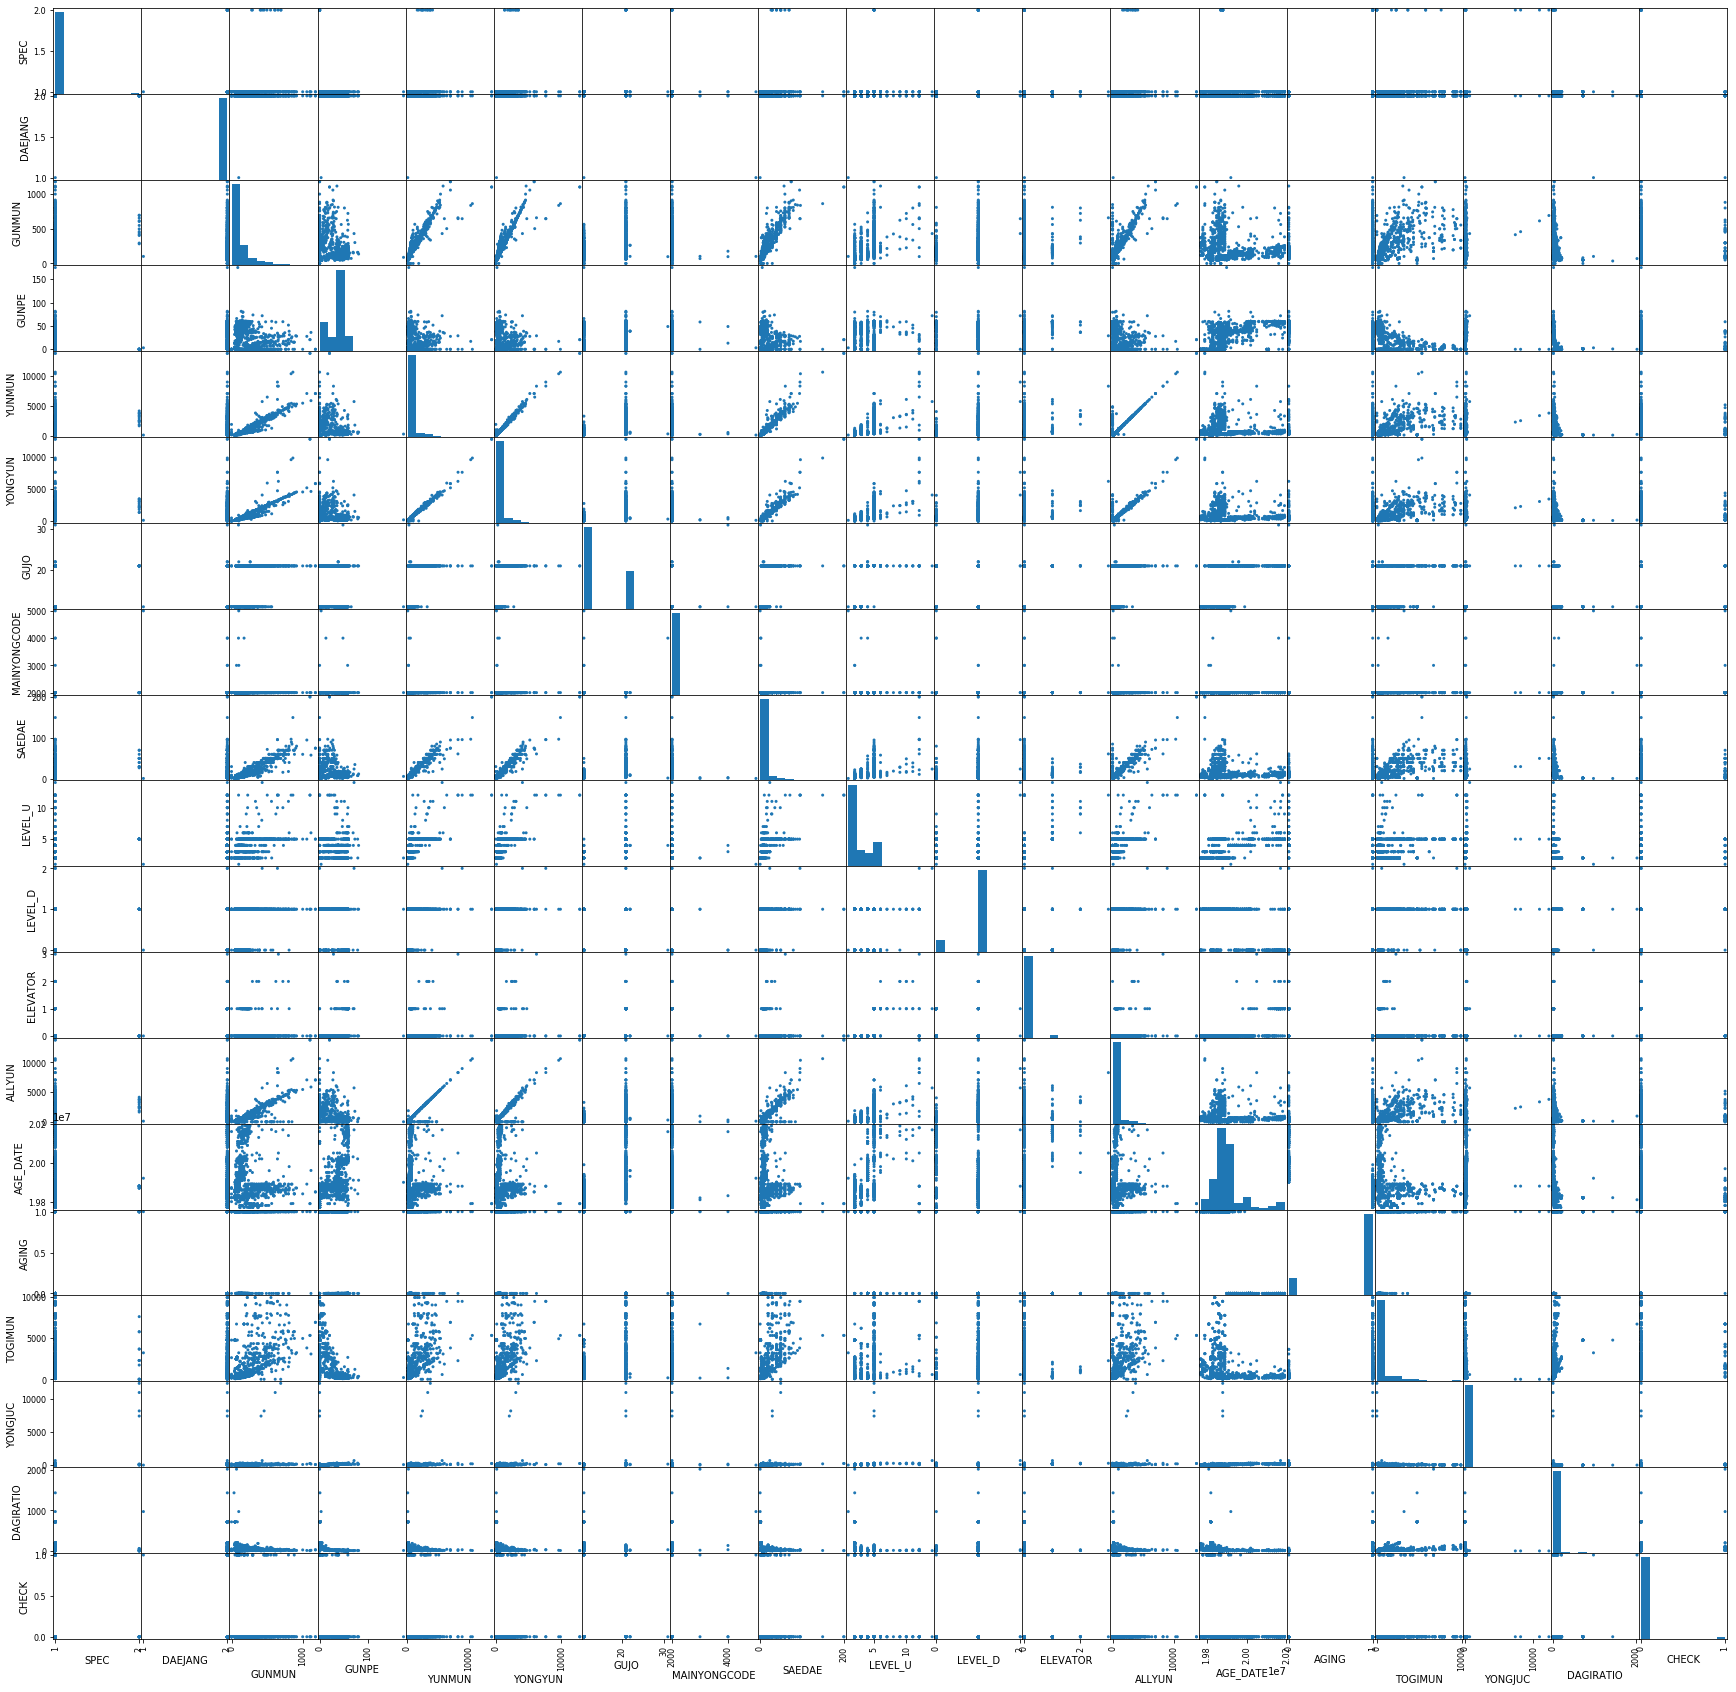

In [10]:
# 종속변수인 CHECK와 상관성이 높은 변수들로 scatter matrix 생성
pd.plotting.scatter_matrix(dataset.loc[:,['SPEC', 'DAEJANG', 'GUNMUN', 'GUNPE', 'YUNMUN', 'YONGYUN', 'GUJO', 'MAINYONGCODE',
                            'SAEDAE', 'LEVEL_U', 'LEVEL_D', 'ELEVATOR', 'ALLYUN', 'AGE_DATE', 'AGING', 'TOGIMUN', 
                            'YONGJUC' ,'DAGIRATIO','CHECK']], alpha=1.0, figsize=(30, 30))
plt.show()

In [3]:
# import libraries
import numpy as np
from numpy import arange
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import scipy as sp
from scipy.special import boxcox1p
from scipy.stats import boxcox, boxcox_normmax, randint, uniform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, make_scorer

<bound method NDFrame.head of          GUNMUN  GUNPE    YUNMUN  YONGYUN  SAEDAE  LEVEL_U  LEVEL_D  ELEVATOR  \
0      163.9700  59.58   659.960   636.56      12        4        1         0   
1       77.8400  37.69   233.520   155.68       6        2        1         0   
2       80.7800  38.10   242.340   161.56       6        2        1         0   
3       77.3100  38.69   231.930   154.62       6        2        1         0   
4       91.6400  53.28   347.390   347.39       8        5        0         0   
5      128.6800  59.57   399.650   399.65       8        5        0         1   
6       81.7600  38.75   245.280   163.52       6        2        1         0   
7      159.8600  37.79   658.320   527.52      15        4        1         0   
8     1110.8575  36.15  5851.125  4633.52      58        6        1         0   
9       80.8800  38.33   242.640   161.76       6        2        1         0   
10     123.1000  58.48   315.240   315.24       6        4        0         0  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF447E9470>,
      dtype=object)

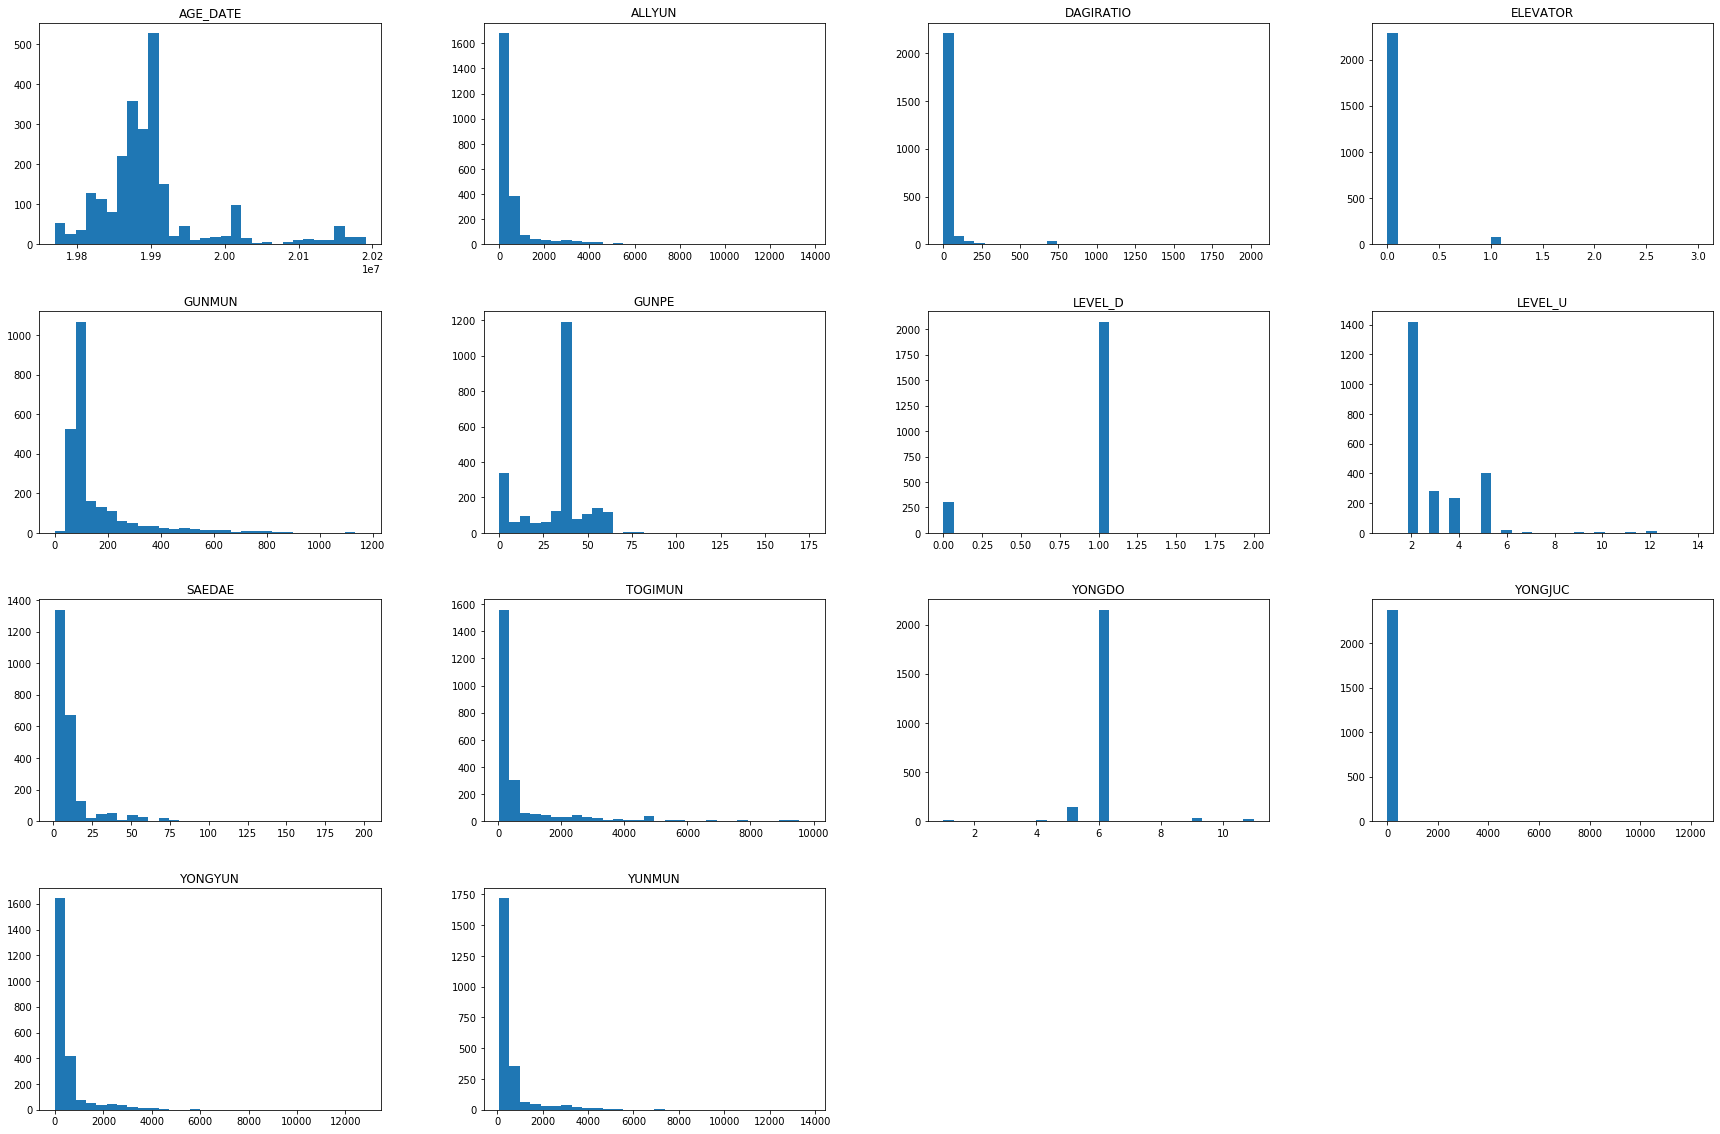

In [4]:
# 데이터 로드 및 확인
filename = ("부천시_최종.csv")
names = ['PK', 'BLOCK_ID','SPEC', 'WICHOC','DAEJANG','DAEJANGNAME', 'ADDR', 'NEWADDR', 
         'BUBCODE',' DAGI', 'BUN', 'GI', 'WEPIL', 'NEWBUBCODE',
         'GUNMUN','GUNPE','YUNMUN','YONGYUN','YONG','GUJO','GUJONAME','GITAGUHO',
         'MAINYONGCODE','MAINYONGNAME','GITAYONG','ROOFCODE','ROOFNAME','GITAROOF',
         'SAEDAE','HEIGHT','LEVEL_U','LEVEL_D','ELEVATOR','EMERGEN_ELE','BUSOC',
         'BUSOCMUN','ALLYUN','INGIGE','INGIGEMUN','OUTGIGE','OUTGIGEMUN','INJAJU','INJAJUMUN'
         ,'OUTJAJU','OUTJAJUMUN','AGE_DATE','AGING','TOGIMUN','YONGDO','CHECK']
'''1	일반상업지역
2	일반상업지역자연녹지지역
3	일반상업지역제3종일반주거지역
4	자연녹지지역제2종일반주거지역
5	제1종일반주거지역
6	제2종일반주거지역
7	제2종일반주거지역제3종일반주거지역
8	제2종일반주거지역준공업지역
9	제3종일반주거지역
10	제3종일반주거지역준주거지역
11  준주거지역'''
dataset = pd.read_csv(filename,encoding='euc_kr',names=names,skiprows=1)
dataset=dataset[dataset['TOGIMUN']<10000]#토지면적이 10000이하만 가져간다
dataset=dataset[dataset['SAEDAE']!=0]
dataset.loc[dataset.YONGDO=='일반상업지역',['YONGDO']]=1
dataset.loc[dataset.YONGDO=='일반상업지역자연녹지지역',['YONGDO']]=2
dataset.loc[dataset.YONGDO=='일반상업지역제3종일반주거지역',['YONGDO']]=3
dataset.loc[dataset.YONGDO=='자연녹지지역제2종일반주거지역',['YONGDO']]=4
dataset.loc[dataset.YONGDO=='제1종일반주거지역',['YONGDO']]=5
dataset.loc[dataset.YONGDO=='제2종일반주거지역',['YONGDO']]=6
dataset.loc[dataset.YONGDO=='제2종일반주거지역제3종일반주거지역',['YONGDO']]=7
dataset.loc[dataset.YONGDO=='제2종일반주거지역준공업지역',['YONGDO']]=8
dataset.loc[dataset.YONGDO=='제3종일반주거지역',['YONGDO']]=9
dataset.loc[dataset.YONGDO=='제3종일반주거지역준주거지역',['YONGDO']]=10
dataset.loc[dataset.YONGDO=='준주거지역',['YONGDO']]=11
#states.loc[states.density > 100, ['density']] = 10
dataset['YONGJUC']=dataset['YONGYUN']*100/dataset['TOGIMUN']#용적률구하기
dataset['DAGIRATIO']=(dataset['TOGIMUN']/dataset['SAEDAE'])/3.306 #대지지분율 구하기 13평보다 커야 효과가 좋음


'''['PK', 'BLOCK_ID','SPEC', 'WICHOC','DAEJANG','DAEJANGNAME', 'ADDR', 'NEWADDR', 
         'BUBCODE',' DAGI', 'BUN', 'GI', 'WEPIL', 'NEWBUBCODE',
         'GUNMUN','GUNPE','YUNMUN','YONGYUN','YONG','GUJO','GUJONAME','GITAGUHO',
         'MAINYONGCODE','MAINYONGNAME','GITAYONG','ROOFCODE','ROOFNAME','GITAROOF',
         'SAEDAE','HEIGHT','LEVEL_U','LEVEL_D','ELEVATOR','EMERGEN_ELE','BUSOC',
         'BUSOCMUN','ALLYUN','INGIGE','INGIGEMUN','OUTGIGE','OUTGIGEMUN','INJAJU','INJAJUMUN'
         ,'OUTJAJU','OUTJAJUMUN','AGE_DATE','AGING','TOGIMUN','YONGDO','CHECK']'''

'''['SPEC', 'DAEJANG', 'GUNMUN', 'GUNPE', 'YUNMUN', 'YONGYUN', 'GUJO', 'MAINYONGCODE',
                            'SAEDAE', 'LEVEL_U', 'LEVEL_D', 'ELEVATOR', 'ALLYUN', 'AGE_DATE', 'AGING', 'TOGIMUN', 
                            'YONGJUC' ,'DAGIRATIO']'''

feature = dataset.drop(['PK', 'BLOCK_ID', 'WICHOC','DAEJANGNAME', 'ADDR', 'NEWADDR', 
                        'BUBCODE',' DAGI', 'BUN', 'GI', 'WEPIL', 'NEWBUBCODE',
                        'YONG','GUJONAME','GITAGUHO','MAINYONGNAME','GITAYONG',
                        'ROOFCODE','ROOFNAME','GITAROOF','HEIGHT','EMERGEN_ELE','BUSOC',
                         'BUSOCMUN','INGIGE','INGIGEMUN','OUTGIGE','OUTGIGEMUN','INJAJU','INJAJUMUN',
                        'OUTJAJU','OUTJAJUMUN','CHECK','SPEC','AGING','MAINYONGCODE','DAEJANG','GUJO'],  axis=1)
#SPEC을 버려야하나? --> 연속형데이터가 아니기때문에 버려도됨 상관분석을 할 수 없음
target = dataset['CHECK']
#axis=0 행전체 삭체, axis=1 열전체 삭제
#feature=feature.dropna(axis=0)

#df2=pd.DataFrame(feature)
#df2.to_csv('TTTT.csv',encoding='euc_kr')

print(feature.head)
feature.hist(bins=30,figsize=(30,20), grid=False)

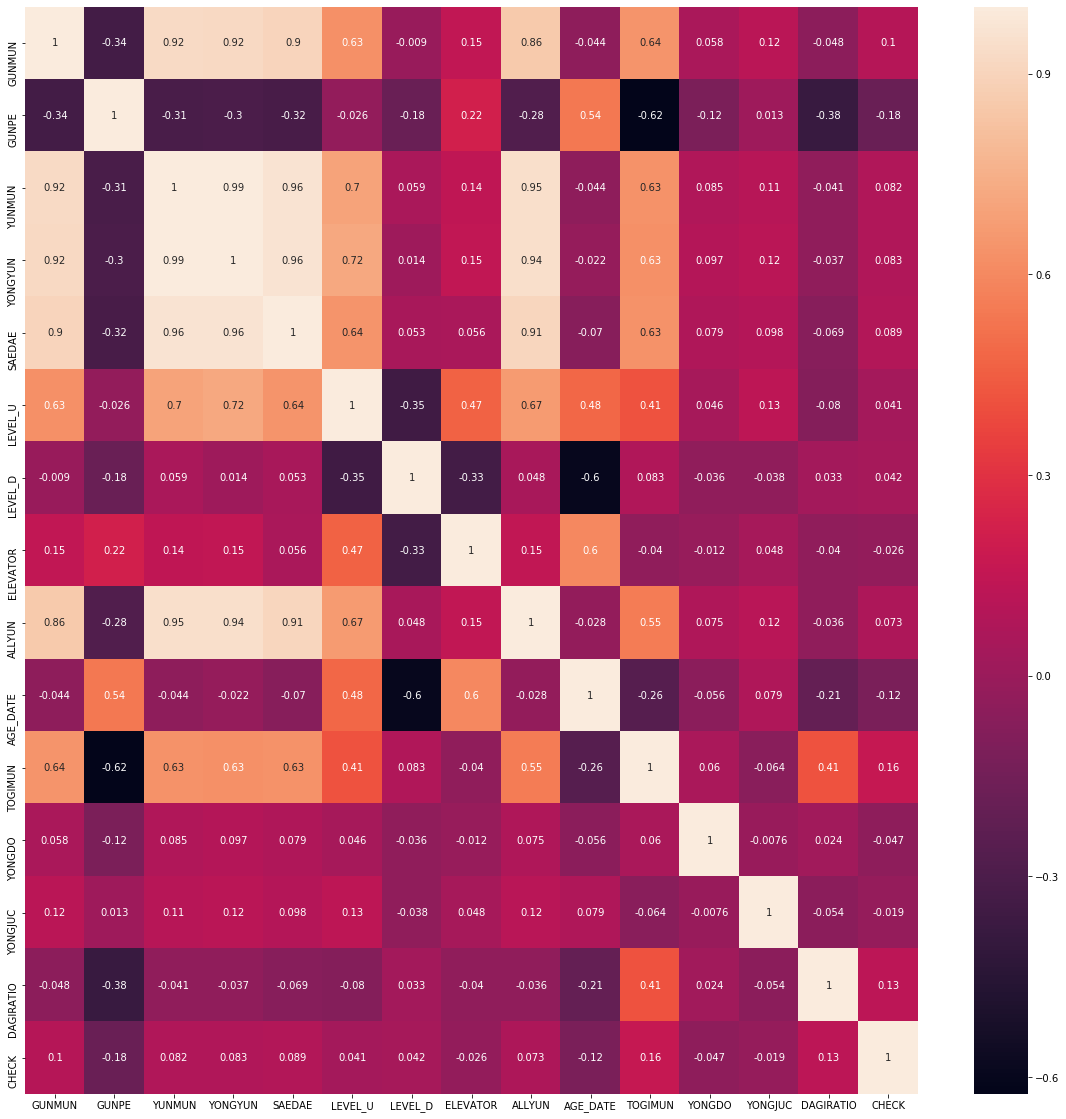

In [71]:
# Transform 된 변수에 대해서 다시 한번 상관성 확인
ax, fig = plt.subplots(figsize=(20,20))
feature['CHECK'] = target
sns.heatmap(feature.corr(), annot=True)
plt.show()
feature = feature.drop(['CHECK'], axis=1)

In [5]:
split_ratio= 0.2
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=split_ratio, random_state=seed)
print(X_train.shape)
print(X_test.shape)

(1903, 14)
(476, 14)


In [63]:
# fit model no training data
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)#warning이 너무 많이나오므로 방지하기 위함
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE

model = LinearRegression()
model.fit(X_train, Y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
f_measure1=f1_score(Y_test,predictions,average='macro')
f_measure2=f1_score(Y_test,predictions,average='micro')
f_measure3=f1_score(Y_test, predictions, average='weighted')
f_measure4=f1_score(Y_test, predictions, average='binary')

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F measure")
print(" Macro: %.2f" %(f_measure1))
print(" Micro: %.2f" %(f_measure2))
print(" weighted: %.2f" %(f_measure3))
print(" binary: %.2f" %(f_measure4))

print('precision: ', metrics.precision_score(Y_test,predictions) )
print('recall: ', metrics.recall_score(Y_test,predictions) )
print(metrics.classification_report(Y_test,predictions))
print('confusionmatrix')
print(metrics.confusion_matrix(Y_test,predictions))
print()

model = Lasso()
model.fit(X_train, Y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f_measure1=f1_score(Y_test,predictions,average='macro')
f_measure2=f1_score(Y_test,predictions,average='micro')
f_measure3=f1_score(Y_test, predictions, average='weighted')
f_measure4=f1_score(Y_test, predictions, average='binary')

print("F measure")
print(" Macro: %.2f" %(f_measure1))
print(" Micro: %.2f" %(f_measure2))
print(" weighted: %.2f" %(f_measure3))
print(" binary: %.2f" %(f_measure4))
print('precision: ', metrics.precision_score(Y_test,predictions) )
print('recall: ', metrics.recall_score(Y_test,predictions) )
print(metrics.classification_report(Y_test,predictions))
print('confusionmatrix')
print(metrics.confusion_matrix(Y_test,predictions))
print()

model = Ridge()
model.fit(X_train, Y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f_measure1=f1_score(Y_test,predictions,average='macro')
f_measure2=f1_score(Y_test,predictions,average='micro')
f_measure3=f1_score(Y_test, predictions, average='weighted')
f_measure4=f1_score(Y_test, predictions, average='binary')

print("F measure")
print(" Macro: %.2f" %(f_measure1))
print(" Micro: %.2f" %(f_measure2))
print(" weighted: %.2f" %(f_measure3))
print(" binary: %.2f" %(f_measure4))
print('precision: ', metrics.precision_score(Y_test,predictions) )
print('recall: ', metrics.recall_score(Y_test,predictions) )
print(metrics.classification_report(Y_test,predictions))
print('confusionmatrix')
print(metrics.confusion_matrix(Y_test,predictions))
print()

model = KNeighborsRegressor()
model.fit(X_train, Y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f_measure1=f1_score(Y_test,predictions,average='macro')
f_measure2=f1_score(Y_test,predictions,average='micro')
f_measure3=f1_score(Y_test, predictions, average='weighted')
f_measure4=f1_score(Y_test, predictions, average='binary')

print("F measure")
print(" Macro: %.2f" %(f_measure1))
print(" Micro: %.2f" %(f_measure2))
print(" weighted: %.2f" %(f_measure3))
print(" binary: %.2f" %(f_measure4))
print('precision: ', metrics.precision_score(Y_test,predictions) )
print('recall: ', metrics.recall_score(Y_test,predictions) )
print(metrics.classification_report(Y_test,predictions))
print('confusionmatrix')
print(metrics.confusion_matrix(Y_test,predictions))
print()

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f_measure1=f1_score(Y_test,predictions,average='macro')
f_measure2=f1_score(Y_test,predictions,average='micro')
f_measure3=f1_score(Y_test, predictions, average='weighted')
f_measure4=f1_score(Y_test, predictions, average='binary')

print("F measure")
print(" Macro: %.2f" %(f_measure1))
print(" Micro: %.2f" %(f_measure2))
print(" weighted: %.2f" %(f_measure3))
print(" binary: %.2f" %(f_measure4))
print('precision: ', metrics.precision_score(Y_test,predictions) )
print('recall: ', metrics.recall_score(Y_test,predictions) )
print(metrics.classification_report(Y_test,predictions))
print('confusionmatrix')
print(metrics.confusion_matrix(Y_test,predictions))
print()

model = SVR()
model.fit(X_train, Y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f_measure1=f1_score(Y_test,predictions,average='macro')
f_measure2=f1_score(Y_test,predictions,average='micro')
f_measure3=f1_score(Y_test, predictions, average='weighted')
f_measure4=f1_score(Y_test, predictions, average='binary')

print("F measure")
print(" Macro: %.2f" %(f_measure1))
print(" Micro: %.2f" %(f_measure2))
print(" weighted: %.2f" %(f_measure3))
print(" binary: %.2f" %(f_measure4))
print('precision: ', metrics.precision_score(Y_test,predictions) )
print('recall: ', metrics.recall_score(Y_test,predictions) )
print(metrics.classification_report(Y_test,predictions))
print('confusionmatrix')
print(metrics.confusion_matrix(Y_test,predictions))
print()

model = RandomForestRegressor()
model.fit(X_train, Y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f_measure1=f1_score(Y_test,predictions,average='macro')
f_measure2=f1_score(Y_test,predictions,average='micro')
f_measure3=f1_score(Y_test, predictions, average='weighted')
f_measure4=f1_score(Y_test, predictions, average='binary')

print("F measure")
print(" Macro: %.2f" %(f_measure1))
print(" Micro: %.2f" %(f_measure2))
print(" weighted: %.2f" %(f_measure3))
print(" binary: %.2f" %(f_measure4))
print('precision: ', metrics.precision_score(Y_test,predictions) )
print('recall: ', metrics.recall_score(Y_test,predictions) )
print(metrics.classification_report(Y_test,predictions))
print('confusionmatrix')
print(metrics.confusion_matrix(Y_test,predictions))
print()

model = AdaBoostRegressor()
model.fit(X_train, Y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f_measure1=f1_score(Y_test,predictions,average='macro')
f_measure2=f1_score(Y_test,predictions,average='micro')
f_measure3=f1_score(Y_test, predictions, average='weighted')
f_measure4=f1_score(Y_test, predictions, average='binary')

print("F measure")
print(" Macro: %.2f" %(f_measure1))
print(" Micro: %.2f" %(f_measure2))
print(" weighted: %.2f" %(f_measure3))
print(" binary: %.2f" %(f_measure4))
print('precision: ', metrics.precision_score(Y_test,predictions) )
print('recall: ', metrics.recall_score(Y_test,predictions) )
print(metrics.classification_report(Y_test,predictions))
print('confusionmatrix')
print(metrics.confusion_matrix(Y_test,predictions))
print()

model = XGBRegressor(n_jobs=-1,objective ='reg:squarederror')
model.fit(X_train, Y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f_measure1=f1_score(Y_test,predictions,average='macro')
f_measure2=f1_score(Y_test,predictions,average='micro')
f_measure3=f1_score(Y_test, predictions, average='weighted')
f_measure4=f1_score(Y_test, predictions, average='binary')

print("F measure")
print(" Macro: %.2f" %(f_measure1))
print(" Micro: %.2f" %(f_measure2))
print(" weighted: %.2f" %(f_measure3))
print(" binary: %.2f" %(f_measure4))
print('precision: ', metrics.precision_score(Y_test,predictions) )
print('recall: ', metrics.recall_score(Y_test,predictions) )
print(metrics.classification_report(Y_test,predictions))
print('confusionmatrix')
print(metrics.confusion_matrix(Y_test,predictions))
print()

model = LGBMRegressor(max_depth=7)
model.fit(X_train, Y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f_measure1=f1_score(Y_test,predictions,average='macro')
f_measure2=f1_score(Y_test,predictions,average='micro')
f_measure3=f1_score(Y_test, predictions, average='weighted')
f_measure4=f1_score(Y_test, predictions, average='binary')

print("F measure")
print(" Macro: %.2f" %(f_measure1))
print(" Micro: %.2f" %(f_measure2))
print(" weighted: %.2f" %(f_measure3))
print(" binary: %.2f" %(f_measure4))
print('precision: ', metrics.precision_score(Y_test,predictions) )
print('recall: ', metrics.recall_score(Y_test,predictions) )
print(metrics.classification_report(Y_test,predictions))
print('confusionmatrix')
print(metrics.confusion_matrix(Y_test,predictions))
print()


#RFE (recursive feature elimination)
model=LinearRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X_train, Y_train)

print("Num Features: %d" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Accuracy: 98.11%
F measure
 Macro: 0.50
 Micro: 0.98
 weighted: 0.97
 binary: 0.00
precision:  0.0
recall:  0.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       467
           1       0.00      0.00      0.00         9

    accuracy                           0.98       476
   macro avg       0.49      0.50      0.50       476
weighted avg       0.96      0.98      0.97       476

confusionmatrix
[[467   0]
 [  9   0]]

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Accuracy: 98.11%
F measure
 Macro: 0.50
 Micro: 0.98
 weighted: 0.97
 binary: 0.00
precision:  0.0
recall:  0.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       467
           1       0.00

C:\Users\say2d\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\say2d\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\say2d\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\say2d\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\say2d\Anaconda3\lib\site-packages\sklearn\metrics\

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
Accuracy: 98.32%
F measure
 Macro: 0.66
 Micro: 0.98
 weighted: 0.98
 binary: 0.33
precision:  0.6666666666666666
recall:  0.2222222222222222
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       467
           1       0.67      0.22      0.33         9

    accuracy                           0.98       476
   macro avg       0.83      0.61      0.66       476
weighted avg       0.98      0.98      0.98       476

confusionmatrix
[[466   1]
 [  7   2]]

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_es

In [6]:
def cal_rmse(y,y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [7]:
# Gridsearch를 위해 rmse 를 평가척도로 따로 설정함. 기본적으로 gridsearchcv 는 score를 maximize하는 방향으로 학습되므로, 
# RMSE를 활용하기 위해서는 greater_is_better=False 로 설정한다.
# RMSE로 진행하더라도 내부적으로 score를 음수로 반환하므로 여기에 -를 곱해주어야한다.
scoring_fn = make_scorer(cal_rmse, greater_is_better=False)

In [81]:
def fit_optimal_model(model,params, x, y, n_folds, seed):
    # 설명 : Randomized search 와 Grid search를 동시에 활용해서 모델의 가장 좋은 parameter를 찾는다.
    
    # -----Input 설명-------- 
    # model은 name, pipeline 으로 받는다.
    # param은 model parameter set
    # x : X training set
    # y : Y training set
    # n_folds = k-fold의 n
    # seed : random seed
    # ----------------------- 
    
    # -----return 설명--------
    # best_model : Grid & Randomized search 결과 성능이 가장 좋은 모델을 반환(pipeline으로)
    # best_param : Grid & Randomized search 결과 성능이 가장 좋은 모델의 parameter set을 반환
    # best_search : Grid & Randomized search 결과 성능이 가장 좋은 search 의 결과물을 반환
    
    
    name, regressor = model
    [grid_param, random_param] = params
    # parameter가 굳이 random search가 필요하지 않은 경우(Gridsearch와 동일한 세팅일 때)엔 Grid search만 진행한다.
    if 'None' in list(random_param.keys()):
        do_random_search = False
    else:
        do_random_search = True   

    # Cross valiation을 위한 k=fold를 나눔
    kfold = KFold(n_splits=n_folds, random_state=seed)

    # 위의 설정을 이용해서 Grid search를 fit 한다.
    grid = GridSearchCV(estimator=regressor,param_grid=grid_param, cv=kfold, scoring=scoring_fn)

    grid_search = grid.fit(x, y)
    
    #AUC ROC   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, grid_search.predict(X_test))
    roc_auc = auc(false_positive_rate, true_positive_rate)

    fig = plt.figure(figsize=(6,4))
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    
    if do_random_search:
        # 위의 설정을 이용해서 Randomized search를 fit 한다.
        randomized_search_iter = 10
        random = RandomizedSearchCV(estimator=regressor, param_distributions=random_param, cv=kfold, scoring=scoring_fn, n_iter=randomized_search_iter)
        random_search = random.fit(x,y)
        
            
    # 두가기 search 결과 비교(RMSE 이므로 낮은 것이 좋음)
    if do_random_search:
        # search 결과 나오는 best_score는 RMSE로 설정했지만 내부적으로 음수로 계산되므로, -를 곱해준다.
        if grid_search.best_score_ * -1 <= random_search.best_score_* -1:
            best_param = grid_search.best_params_
            best_pipeline = grid_search.best_estimator_
            best_search = grid_search
        else:
            best_param = random_search.best_params_
            best_pipeline = random_search.best_estimator_
            best_search = random_search
    else:
            best_param = grid_search.best_params_
            best_pipeline = grid_search.best_estimator_
            best_search = grid_search

            
    return best_pipeline, best_param, best_search

In [60]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
# Regression Model 별 파라미터 셋 정리
regression_models = [('LR',Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])), 
                     ('LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])), 
                     ('RIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])), 
                     ('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])), 
                     ('CART',Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])),
                     ('SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))]
regression_params = {'LR' : [{"LR__fit_intercept": [True, False]}, {"None": [True, False]}],
                        'LASSO' : [{"LASSO__alpha": [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}, {"LASSO__alpha": uniform(1e-4, 10)}],
                        'RIDGE' : [{"RIDGE__alpha": [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}, {"RIDGE__alpha": uniform(1e-4, 10)}],
                        'KNN' : [{'KNN__n_neighbors': [3,4,5,6,7,8,9,10]}, {'KNN__n_neighbors': randint(3, 10)}],
                        'CART' : [{"CART__max_depth": range(6,10,1),"CART__min_samples_split": [2, 3, 4, 5]},
                                 {"CART__max_depth": randint(6,10),"CART__min_samples_split":randint(2, 5)}],
                        'SVR' : [{'SVR__kernel':['rbf', 'poly', 'sigmoid']},{'None':['rbf', 'poly', 'sigmoid']}]}

LR: 0.124221 (0.040728) 
{'LR__fit_intercept': True}
LASSO: 0.123504 (0.045439) 
{'LASSO__alpha': 0.01}
RIDGE: 0.124034 (0.041204) 
{'RIDGE__alpha': 10}
KNN: 0.112722 (0.039963) 
{'KNN__n_neighbors': 5}
CART: 0.114830 (0.040363) 
{'CART__max_depth': 7, 'CART__min_samples_split': 2}


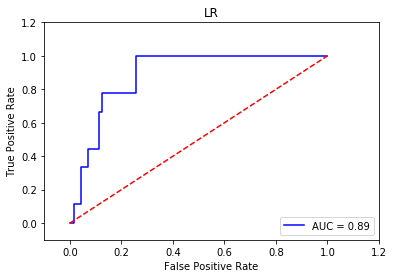

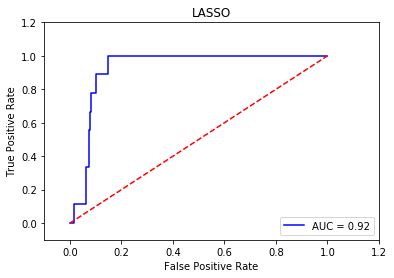

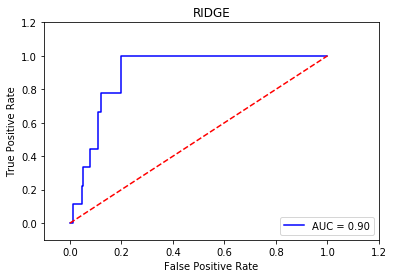

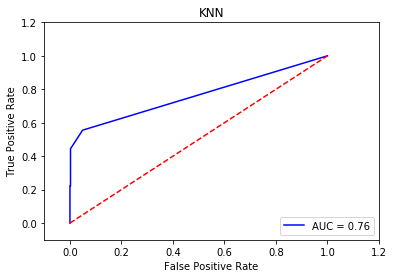

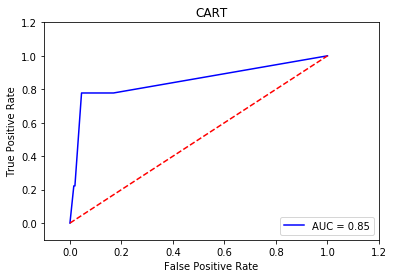

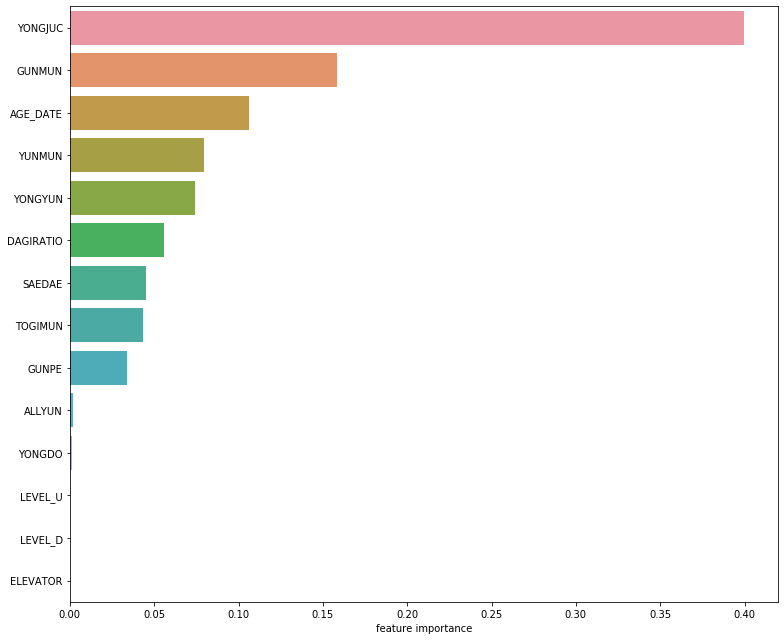

SVR: 0.144679 (0.027772) 
{'SVR__kernel': 'rbf'}


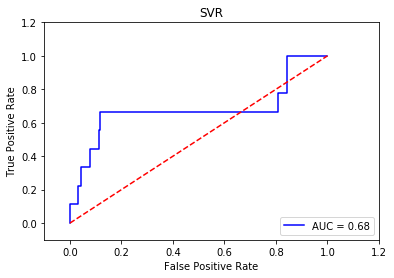

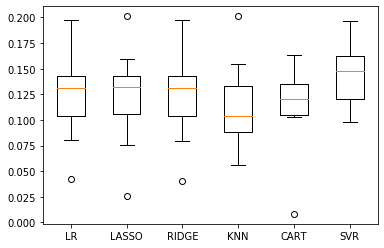

In [82]:
# 각 모델들을 cross-valiation 하여 그 평균적인 RMSE 값을 확인한다.
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import ExtraTreesClassifier


warnings.filterwarnings(action='ignore', category=DeprecationWarning)#warning이 너무 많이나오므로 방지하기 위함
warnings.filterwarnings(action='ignore', category=FutureWarning)
n_folds = 10
results = []
names = []
for reg_model in regression_models:
    name, model = reg_model
    kfold = KFold(n_splits=n_folds, random_state=seed)
    pipeline,best_param,_ = fit_optimal_model(reg_model, regression_params[name], X_train, Y_train,n_folds, seed)
    cv_results = -cross_val_score(pipeline, X_train, Y_train, cv=kfold, scoring=scoring_fn)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) " % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(best_param)
    
    
    
    # 각 모델에서 사용된 변수들의 importance 확인
    if 'CART' in name:
        best_model = pipeline.named_steps[name]
        ranking = np.argsort(-best_model.feature_importances_)
        f, ax = plt.subplots(figsize=(11, 9))
        sns.barplot(x=best_model.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
        ax.set_xlabel("feature importance")
        plt.tight_layout()
        plt.show()
    
fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [83]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# Regression Model 별 파라미터 셋 정리
ensemble_models = [
                    ('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])),
                   ('AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])),
                   ('XG', Pipeline([('Scaler', StandardScaler()),('XG', XGBRegressor(n_jobs=-1,objective ='reg:squarederror'))])),
                   ('LightGBM', Pipeline([('Scaler', StandardScaler()),('LightGBM', LGBMRegressor(max_depth=7))]))
                    ]

ensenble_params = { 
                    'XG' : [{"XG__n_estimators": range(100,300,50),"XG__max_depth": range(4,7,1),"XG__learning_rate": [1e-4, 1e-3, 1e-2, 1e-1], 'XG__min_child_weight': [1,3,5], 'XG__subsample': [0.8, 0.9, 1.0], 'XG__colsample_bytree': [0.8, 0.9, 1.0]},
                           {"XG__n_estimators": randint(100,300), "XG__max_depth": randint(4,7), "XG__learning_rate": uniform(1e-4, 1e-1), 'XG__min_child_weight': [1,3,5], 'XG__subsample':uniform(0.8 , 0.2),  'XG__colsample_bytree':uniform(0.8, 0.2)}],
                    'AB' : [{"AB__n_estimators": range(100,300,50),"AB__learning_rate": [1e-4, 1e-3, 1e-2, 1e-1],"AB__loss": ['linear','square','exponential']},
                            {"AB__n_estimators": randint(100,300),"AB__learning_rate": uniform(1e-4, 1e-1),"AB__loss": ['linear','square','exponential']}],
                    'RF' : [{"RF__n_estimators": range(100,300,50),"RF__max_depth": range(4,7,1),"RF__min_samples_split": [2,3,4,5],"RF__bootstrap": [True, False]},
                            {"RF__n_estimators": randint(100,300),"RF__max_depth": randint(4,7),"RF__min_samples_split":randint(2, 5),"RF__bootstrap": [True, False]}],
                   'LightGBM' : [{"LightGBM__n_estimators": range(100,300,50),"LightGBM__num_leaves": range(40,80,10), "LightGBM__learning_rate": [1e-4, 1e-3, 1e-2, 1e-1],"LightGBM__boosting" : ['gbdt', 'dart']},
                            {"LightGBM__n_estimators": randint(100,300), "LightGBM__num_leaves": randint(40, 80), "LightGBM__learning_rate": uniform(1e-4, 1e-1), "LightGBM__boosting" : ['gbdt', 'dart'] }]
                  }

In [84]:
# 각 모델들을 cross-valiation 하여 그 평균적인 RMSE 값을 확인한다.

n_folds = 10
results = []
names = []
for ens_model in ensemble_models:
    name, model = ens_model
    kfold = KFold(n_splits=n_folds, random_state=seed)
    pipeline,best_param,_ = fit_optimal_model(ens_model, ensenble_params[name], X_train, Y_train,n_folds, seed)
    cv_results = -cross_val_score(pipeline, X_train, Y_train, cv=kfold, scoring=scoring_fn)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(best_param)
    # 각 모델에서 사용된 변수들의 importance 확인
    best_model = pipeline.named_steps[name]
    ranking = np.argsort(-best_model.feature_importances_)
    f, ax = plt.subplots(figsize=(11, 9))
    sns.barplot(x=best_model.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
    ax.set_xlabel("feature importance")
    plt.tight_layout()
    plt.show()
    
fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

KeyboardInterrupt: 